In [13]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# load the dataset
path = "/Users/peppermint/Desktop/codes/python/cybersecurity-jina/data/small_result220.csv"
df = read_csv(path)
df = df.iloc[:, 1:] # skip unnamed: 0 column
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [14]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,1.519292e+09,293,3,0,46,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,80,6,1.519292e+09,54194516,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,80,6,1.519292e+09,948,3,4,148,243,148,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,80,6,1.519292e+09,103,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,80,6,1.519292e+09,818,3,4,161,488,161,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [15]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
14995,80,6,1.519273e+09,5007623,5,3,694,1903,694,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
14996,80,6,1.519274e+09,5011797,5,3,704,2033,704,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
14997,80,6,1.519264e+09,5934694,21,11,5132,16976,680,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
14998,80,6,1.519264e+09,6860324,28,15,7294,23629,680,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
14999,80,6,1.519298e+09,226,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [16]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [17]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [18]:
# define the  model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, batch_size=16, epochs=50, shuffle=True, verbose=2, validation_data=(X_test,y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()

Epoch 1/50
629/629 - 2s - loss: 1916984.2500 - accuracy: 0.9484 - val_loss: 164566.4375 - val_accuracy: 0.9776 - 2s/epoch - 3ms/step
Epoch 2/50
629/629 - 2s - loss: 657330.1250 - accuracy: 0.9583 - val_loss: 226365.7812 - val_accuracy: 0.9832 - 2s/epoch - 3ms/step
Epoch 3/50
629/629 - 1s - loss: 676609.5625 - accuracy: 0.9571 - val_loss: 384814.1250 - val_accuracy: 0.9832 - 1s/epoch - 2ms/step
Epoch 4/50
629/629 - 1s - loss: 505442.8750 - accuracy: 0.9627 - val_loss: 839195.0000 - val_accuracy: 0.2659 - 1s/epoch - 2ms/step
Epoch 5/50
629/629 - 1s - loss: 550510.9375 - accuracy: 0.9597 - val_loss: 559328.4375 - val_accuracy: 0.9752 - 1s/epoch - 2ms/step
Epoch 6/50
629/629 - 1s - loss: 579171.1250 - accuracy: 0.9634 - val_loss: 31019.5098 - val_accuracy: 0.9820 - 1s/epoch - 2ms/step
Epoch 7/50
629/629 - 2s - loss: 438860.3750 - accuracy: 0.9642 - val_loss: 278763.8438 - val_accuracy: 0.9836 - 2s/epoch - 4ms/step
Epoch 8/50
629/629 - 2s - loss: 409481.6250 - accuracy: 0.9659 - val_loss: 1

155/155 [==============================] - 1s 5ms/step


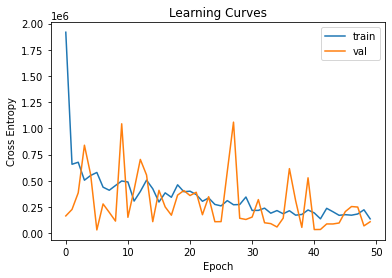

In [19]:
# predict test set
yhat = model.predict(X_test)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [20]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Accuracy: 0.982626
Precision: 0.862745
Recall: 0.357724
F1 score: 0.505747


In [21]:
X_test.shape

(4950, 79)

In [22]:
X_test[0].shape

(79,)

In [23]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 44ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [24]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
NUM_TO_CONSIDER = 10
correct = 0
for got, expected in zip(model.predict(X_test[:NUM_TO_CONSIDER]), y_test[:NUM_TO_CONSIDER]):
    if int(got[0]) == int(expected):
        print(f"correct: {int(got[0])} == {int(expected)}")
        correct += 1

total_score = correct / NUM_TO_CONSIDER
print(f"total score: {total_score}")


1/1 [==============================] - 0s 27ms/step
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
total score: 1.0


In [26]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519349387.0,56705690,203,104,56083,189900,680,0,276.2709359606,291.6989844299,1935,0,1825.9615384615,320.3787783439,4337.8891959519,5.4139187796,185312.712418301,362882.704589828,1014075,25,56703383,280709.816831683,415824.191561832,1014075,440,56705665,550540.436893204,440061.419389244,1016698,36,0,0,0,0,4072,2092,3.5798876621,1.8340311175,0,1935,798.6461038961,794.0143633481,630458.809203012,0,0,1,1,0,0,0,1,0,801.2475570033,276.2709359606,1825.9615384615,0,0,0,0,0,0,203,56083,104,189900,8192,1281,101,20,0,0,0,0,0,0,0,0] # known_attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 72ms/step


1.0

In [27]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519348465.0,132,3,0,0,0,0,0,0,0,0,0,0,0,0,22727.2727272727,66,84.8528137424,126,6,132,66,84.8528137424,126,6,0,0,0,0,0,0,0,0,0,60,0,22727.2727272727,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2053,-1,0,20,0,0,0,0,0,0,0,0] # known attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 89ms/step


0.0

In [28]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [29]:
model.summary() # before

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               10240     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Model(inputs=model.input, outputs=model.get_layer("dense_2").output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2_input (InputLayer)  [(None, 79)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               10240     
                                                                 
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
_________________________________________________________________


In [32]:
preds = model.predict(X_test[:10])
preds.shape

1/1 [==============================] - 0s 63ms/step


(10, 128)

# vectors are 128-D now (as opposed to 79 from before)

In [33]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
X_test[0].shape # old shape

(79,)

In [35]:
preds[0].shape # new shape

(128,)

In [37]:
from jina import Document, DocumentArray

In [38]:
da = DocumentArray.from_csv(path)
da.summary()

╭──────────── Documents Summary ────────────╮
│                                           │
│   Length                 15000            │
│   Homogenous Documents   True             │
│   Common Attributes      ('id', 'tags')   │
│                                           │
╰───────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    15000            False             │
│   tags        ('dict',)   15000            False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

In [55]:
import pandas as pd


df = pd.read_csv("/Users/peppermint/Desktop/codes/python/cybersecurity-jina/data/small_result220.csv")
# df = df.iloc[:, 1:] # skip unnamed: 0 column
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [56]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,1.519292e+09,293,3,0,46,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,80,6,1.519292e+09,54194516,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,80,6,1.519292e+09,948,3,4,148,243,148,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,80,6,1.519292e+09,103,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,80,6,1.519292e+09,818,3,4,161,488,161,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [57]:
X_only = df.iloc[:, :-1].astype("float32")
y_only = df.iloc[:, -1].astype("float32")
y_only

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14995    1.0
14996    1.0
14997    1.0
14998    1.0
14999    1.0
Name: Label, Length: 15000, dtype: float32

In [58]:
res = model.predict(X_only)
res.shape

469/469 [==============================] - 2s 5ms/step


(15000, 128)

In [59]:
embeddings_df = pd.DataFrame(res)
embeddings_df["Label"] = y_only
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,0.0,0.0,0.0,0.0,0.0,127723216.0,0.0,166023632.0,105039848.0,0.0,...,0.00000,0.0,0.0,395410400.0,79280784.0,0.0,0.0,0.0,421999360.0,0.0
1,0.0,78386952.0,0.0,0.0,0.0,277745920.0,0.0,285697920.0,235396112.0,0.0,...,0.00000,0.0,0.0,238939296.0,0.0,0.0,0.0,71097216.0,584876288.0,0.0
2,0.0,0.0,0.0,0.0,0.0,128515192.0,0.0,166765824.0,105698248.0,0.0,...,0.00000,0.0,0.0,394663200.0,78490760.0,0.0,0.0,0.0,422798656.0,0.0
3,0.0,0.0,0.0,0.0,0.0,127244544.0,0.0,165571552.0,104642072.0,0.0,...,0.00000,0.0,0.0,395862880.0,79754784.0,0.0,0.0,0.0,421513184.0,0.0
4,0.0,0.0,0.0,0.0,0.0,129658712.0,0.0,167828896.0,106642424.0,0.0,...,309475.03125,0.0,0.0,393591456.0,77353904.0,0.0,0.0,0.0,423949632.0,0.0


In [60]:
# embeddings_df.to_csv("dataset_2_embeddings_df.csv", index=0)

In [61]:
result = pd.concat([embeddings_df, df], axis=1)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,0.0,0.0,0.0,127723216.0,0.0,166023632.0,105039848.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,0.0,78386952.0,0.0,0.0,0.0,277745920.0,0.0,285697920.0,235396112.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [62]:
result = result.sample(frac=1, random_state=0)
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
10799,0.0,136821680.0,0.0,0.0,0.0,484221024.0,20986618.0,431353664.0,409606752.0,0.0,...,20,0.0,0.0,0,0,85984563.0,0.0,85984563,85984563,0
2732,0.0,0.0,0.0,0.0,0.0,128002280.0,0.0,166285120.0,105271256.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [63]:
import random
import time
from datetime import datetime
dates = []
def randomDate(start, end):
    frmt = '%d-%m-%Y %H:%M:%S'

    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))

    ptime = stime + random.random() * (etime - stime)
    dt = datetime.fromtimestamp(time.mktime(time.localtime(ptime)))
    return dt

for i in range(0 , len(result)):
    dates.append(randomDate("20-01-2018 13:30:00", "23-01-2018 04:50:34"))
dates

[datetime.datetime(2018, 1, 21, 20, 46, 28),
 datetime.datetime(2018, 1, 22, 0, 37, 29),
 datetime.datetime(2018, 1, 22, 16, 32, 44),
 datetime.datetime(2018, 1, 20, 20, 24, 57),
 datetime.datetime(2018, 1, 22, 16, 45, 37),
 datetime.datetime(2018, 1, 23, 3, 40, 6),
 datetime.datetime(2018, 1, 21, 5, 40, 14),
 datetime.datetime(2018, 1, 20, 21, 19, 56),
 datetime.datetime(2018, 1, 20, 18, 40, 48),
 datetime.datetime(2018, 1, 22, 5, 15, 5),
 datetime.datetime(2018, 1, 20, 21, 11, 56),
 datetime.datetime(2018, 1, 21, 15, 13, 9),
 datetime.datetime(2018, 1, 20, 15, 49, 14),
 datetime.datetime(2018, 1, 22, 9, 44, 6),
 datetime.datetime(2018, 1, 22, 23, 59, 49),
 datetime.datetime(2018, 1, 20, 16, 8, 15),
 datetime.datetime(2018, 1, 21, 15, 35, 32),
 datetime.datetime(2018, 1, 22, 16, 15, 53),
 datetime.datetime(2018, 1, 22, 4, 9, 38),
 datetime.datetime(2018, 1, 21, 7, 52, 7),
 datetime.datetime(2018, 1, 22, 10, 40, 20),
 datetime.datetime(2018, 1, 21, 5, 27, 39),
 datetime.datetime(2018, 

In [64]:
result.insert(loc=len(result.columns)-1, column='dt', value=dates)
result.head(2)


,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1670,0.0,11893622.0,0.0,0.0,0.0,134486208.0,0.0,137299360.0,82991176.0,0.0,...,157862.333333,357466.616707,887538,11869,9.991216e+06,22762.226995,10001849,9944781,2018-01-21 20:46:28,0
13379,0.0,0.0,0.0,0.0,0.0,128208216.0,0.0,166481280.0,105443928.0,0.0,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,2018-01-22 00:37:29,0


In [65]:
result.sort_values(by="dt", inplace=True)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1469,0.0,30507650.0,0.0,0.0,0.0,128301072.0,0.0,110489752.0,59713992.0,0.0,...,27409.363636,21635.261127,92642,20839,1.000596e+07,14032.553854,10010275,9963654,2018-01-20 13:30:21,0
12215,0.0,0.0,0.0,0.0,0.0,128371336.0,0.0,166059344.0,105106672.0,0.0,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,2018-01-20 13:30:22,0


In [66]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
2366,0.0,0.0,0.0,0.0,0.0,127549424.0,0.0,164850608.0,104111832.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:49:48,0
11699,0.0,0.0,0.0,0.0,0.0,127559464.0,0.0,165874800.0,104905008.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:30,0


In [67]:
result.iloc[:, :128].head(2)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1469,0.0,30507650.0,0.0,0.0,0.0,128301072.0,0.0,110489752.0,59713992.0,0.0,...,0.0,0.0,0.0,0.0,437229536.0,79533872.0,0.0,0.0,0.0,468809152.0
12215,0.0,0.0,0.0,0.0,0.0,128371336.0,0.0,166059344.0,105106672.0,0.0,...,0.0,0.0,0.0,0.0,395237696.0,78649616.0,0.0,0.0,0.0,423042464.0


In [68]:
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1469,0.0,30507650.0,0.0,0.0,0.0,128301072.0,0.0,110489752.0,59713992.0,0.0,...,27409.363636,21635.261127,92642,20839,1.000596e+07,14032.553854,10010275,9963654,2018-01-20 13:30:21,0
12215,0.0,0.0,0.0,0.0,0.0,128371336.0,0.0,166059344.0,105106672.0,0.0,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,2018-01-20 13:30:22,0


In [69]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
2366,0.0,0.0,0.0,0.0,0.0,127549424.0,0.0,164850608.0,104111832.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:49:48,0
11699,0.0,0.0,0.0,0.0,0.0,127559464.0,0.0,165874800.0,104905008.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:30,0


In [70]:
# result.to_csv("dataset_2_embeddings_df_with_details.csv", index=0)

## in app

In [71]:
from jina import Document, DocumentArray

In [72]:
da = DocumentArray.load("index")
da.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 15101                         │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   15101            False             │
│   id          ('str',)       15101            False             │
│   tags        ('dict',)      15101            False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [73]:
da_df = da.to_dataframe()
da_df.head(2)

,id,parent_id,granularity,adjacency,blob,tensor,mime_type,text,weight,uri,tags,offset,location,embedding,modality,evaluations,scores,chunks,matches
0,9a7328551377d4c1e80d9e83a013b634,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2018-01-20 13:30:1...",None,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None
1,104b68922ce124f2a18bce741111d6fb,None,None,None,None,None,None,None,None,None,"{'protocol': 6.0, 'port': 41008.0, 'dt': '2018...",None,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None
